## Rating Prediction

In [2]:
# importing the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

from wordcloud import WordCloud
from wordcloud import STOPWORDS

# using train test split
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    RandomizedSearchCV,
)
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
)

<IPython.core.display.Javascript object>

In [3]:
rr = pd.read_csv(r"C:\Users\tusha\Desktop\flip robo\project 11\Reviews.csv")
rr

,Unnamed: 0,Ratings,Full_review
0,0,5.0,My first impression and One day full usage. 1....
1,1,2.0,I PURCHASED LAPTOP 1 MONTH BACK AND NOW I AM F...
2,2,4.0,Laptop is good at 8gb ram. After I've upgraded...
3,3,5.0,Everything is best. In this price range it is ...
4,4,5.0,It's almost a year I have this laptop It works...
...,...,...,...
103975,103975,5.0,Bought this few days ago and working very good...
103976,103976,3.0,Maximum speed over WiFi is 100Mbps even though...
103977,103977,5.0,It is working fine. Installation was easy. Onl...
103978,103978,4.0,WORST THING I EVER GOT. NOT AT ALL WORKING. MY...


<IPython.core.display.Javascript object>

In [4]:
# checking the shape of the datast.
print("Shape :", rr.shape)

Shape : (103980, 3)


<IPython.core.display.Javascript object>

In [5]:
# printing the name of the columns.
print("Columns :", rr.columns)

Columns : Index(['Unnamed: 0', 'Ratings', 'Full_review'], dtype='object')


<IPython.core.display.Javascript object>

#### As far as now it can be seen that there is no change for the name of the columns. So, I will leave as it is to the name of the columns

In [6]:
# Now checking the datatype of the columns
print("Datatypes :\n", rr.dtypes)

Datatypes :
 Unnamed: 0       int64
Ratings        float64
Full_review     object
dtype: object


<IPython.core.display.Javascript object>

In [7]:
# This method prints information about a rrFrame including the index dtype and column dtypes, non-null values and memory usage.
rr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103980 entries, 0 to 103979
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   103980 non-null  int64  
 1   Ratings      103862 non-null  float64
 2   Full_review  103868 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ MB


<IPython.core.display.Javascript object>

In [8]:
# Checking the missing values present in the dataset.
rr.isnull().sum()

Unnamed: 0       0
Ratings        118
Full_review    112
dtype: int64

<IPython.core.display.Javascript object>

In [9]:
# checking for the missig values.
print("Missing Value Count :")
print(rr.isnull().sum())

Missing Value Count :
Unnamed: 0       0
Ratings        118
Full_review    112
dtype: int64


<IPython.core.display.Javascript object>

#### Printing the percentage of the missing values present in the dataset.

In [10]:
# Printing the Percentage of the missing values in the dataset.
print("Percentage of the missing values :")
print(rr.isna().mean().round(4) * 100)

Percentage of the missing values :
Unnamed: 0     0.00
Ratings        0.11
Full_review    0.11
dtype: float64


<IPython.core.display.Javascript object>

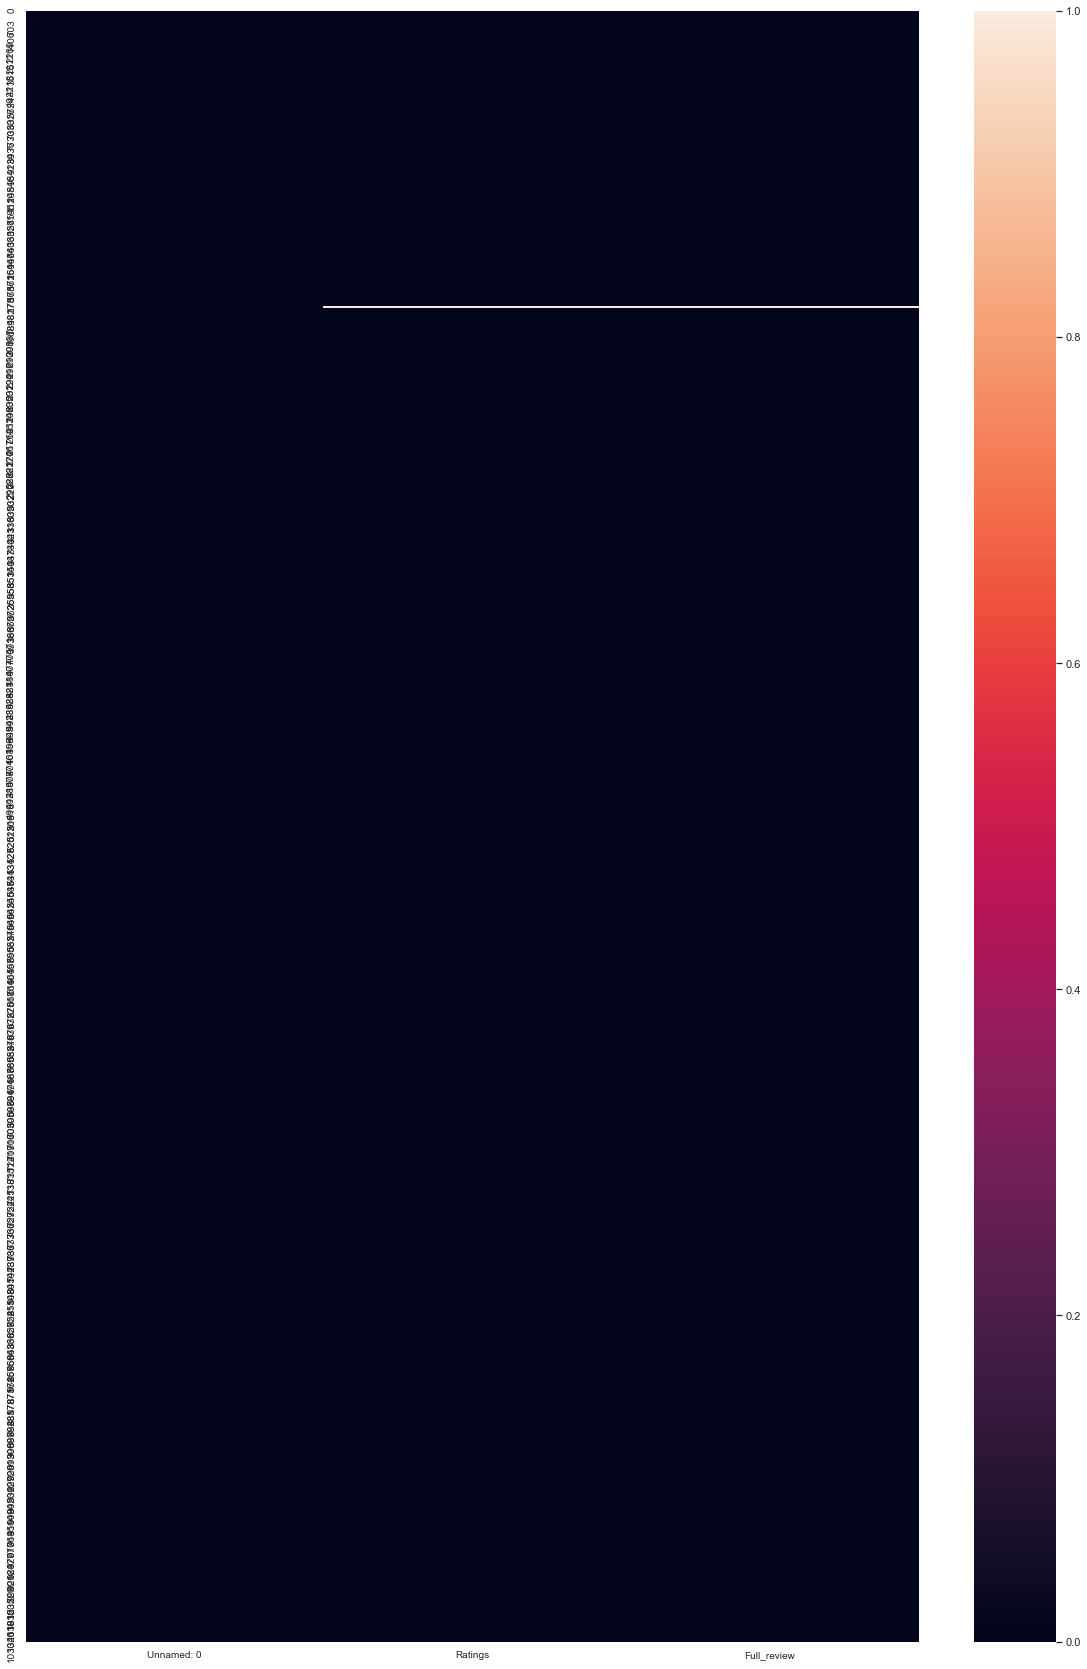

<IPython.core.display.Javascript object>

In [11]:
# plotting the heatmap for the missing vlaues present in the dataset.
sns.set(rc={"figure.figsize": (20, 30)})
sns.heatmap(data=rr.isnull())
plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=90, fontsize=10)
plt.show()

In [12]:
# Total missing value count
print("Total Missing Value Count :", rr.isnull().sum().values.sum())

Total Missing Value Count : 230


<IPython.core.display.Javascript object>

In [13]:
# checking if there is any duplicate values present in the dataset.
print(rr.duplicated().value_counts())

False    103980
dtype: int64


<IPython.core.display.Javascript object>

In [14]:
# printing the duplicate present in the dataset.
print(rr[rr.duplicated()])

Empty DataFrame
Columns: [Unnamed: 0, Ratings, Full_review]
Index: []


<IPython.core.display.Javascript object>

In [15]:
# removing the column named as Unnamed: 0
rr = rr.drop("Unnamed: 0", axis=1)
rr

,Ratings,Full_review
0,5.0,My first impression and One day full usage. 1....
1,2.0,I PURCHASED LAPTOP 1 MONTH BACK AND NOW I AM F...
2,4.0,Laptop is good at 8gb ram. After I've upgraded...
3,5.0,Everything is best. In this price range it is ...
4,5.0,It's almost a year I have this laptop It works...
...,...,...
103975,5.0,Bought this few days ago and working very good...
103976,3.0,Maximum speed over WiFi is 100Mbps even though...
103977,5.0,It is working fine. Installation was easy. Onl...
103978,4.0,WORST THING I EVER GOT. NOT AT ALL WORKING. MY...


<IPython.core.display.Javascript object>

#### As we can see that there are missing values present in the dataset.

In [16]:
# droping the missing values that has no use.
rr = rr.dropna()

<IPython.core.display.Javascript object>

In [17]:
# checking the shape of the dataset after dropping the missing values.
rr.shape

(103862, 2)

<IPython.core.display.Javascript object>

In [18]:
# Again checking the missing values Percentage after dropping the missing vlaues.
print("Percentage of missing values :")
print(rr.isna().mean().round(4) * 100)

Percentage of missing values :
Ratings        0.0
Full_review    0.0
dtype: float64


<IPython.core.display.Javascript object>

In [19]:
# The describe() method is used for calculating some statistical rr like percentile, mean and std of the numerical values of the Series or rrFrame
rr.describe()

,Ratings
count,103862.000000
mean,4.230219
std,1.256857
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


<IPython.core.display.Javascript object>

In [20]:
# count of reviews w.r.t ratings.
rr.Ratings.value_counts()

5.0    64792
4.0    20455
1.0     9684
3.0     6033
2.0     2898
Name: Ratings, dtype: int64

<IPython.core.display.Javascript object>

#### As we have seen that the data is imbalanced.

### Word Count

In [21]:
rr["length"] = rr.Full_review.str.len()
rr.head()

,Ratings,Full_review,length
0,5.0,My first impression and One day full usage. 1....,496
1,2.0,I PURCHASED LAPTOP 1 MONTH BACK AND NOW I AM F...,494
2,4.0,Laptop is good at 8gb ram. After I've upgraded...,305
3,5.0,Everything is best. In this price range it is ...,499
4,5.0,It's almost a year I have this laptop It works...,141


<IPython.core.display.Javascript object>

In [22]:
# Display the top 5 entries of the review column
rr.Full_review.head()

0    My first impression and One day full usage. 1....
1    I PURCHASED LAPTOP 1 MONTH BACK AND NOW I AM F...
2    Laptop is good at 8gb ram. After I've upgraded...
3    Everything is best. In this price range it is ...
4    It's almost a year I have this laptop It works...
Name: Full_review, dtype: object

<IPython.core.display.Javascript object>

In [23]:
# TextBlob is alibrary for processing textual rr. It provides a simple API for diving into common natural language processing (NLP)
# tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.
! pip install textblob

<IPython.core.display.Javascript object>

In [24]:
# convert text to lowercase

rr["Full_review"] = rr["Full_review"].apply(lambda x: str(x).lower())

# rr["Full_review"] = rr["Full_review"].str.lower()

<IPython.core.display.Javascript object>

In [25]:
rr["Full_review"]

# It can be seen that all the review has been converted into the lowercase.

0         my first impression and one day full usage. 1....
1         i purchased laptop 1 month back and now i am f...
2         laptop is good at 8gb ram. after i've upgraded...
3         everything is best. in this price range it is ...
4         it's almost a year i have this laptop it works...
                                ...                        
103975    bought this few days ago and working very good...
103976    maximum speed over wifi is 100mbps even though...
103977    it is working fine. installation was easy. onl...
103978    worst thing i ever got. not at all working. my...
103979                                          best router
Name: Full_review, Length: 103862, dtype: object

<IPython.core.display.Javascript object>

In [26]:
# removing the punctuation, unnecessary spaces, noise removal
rr["Full_review"] = rr["Full_review"].str.replace(r"[^\w\d\s]", " ")


rr["Full_review"] = rr["Full_review"].str.replace(r"\s+", " ")


rr["Full_review"] = rr["Full_review"].str.replace(r"^\s+|\s+?$", "")

rr["Full_review"] = rr["Full_review"].str.replace(
    r"^.+@[^\.].*\.[a-z]{2,}$", "emailaddress"
)

rr["Full_review"] = rr["Full_review"].str.replace(
    r"^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$", "webaddress"
)

rr["Full_review"] = rr["Full_review"].str.replace(r"£|\$", "dollers")

rr["Full_review"] = rr["Full_review"].str.replace(
    r"^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$", "phonenumber"
)

rr["Full_review"] = rr["Full_review"].str.replace(r"\d+(\.\d+)?", "numbr")

<IPython.core.display.Javascript object>

In [27]:
rr["Full_review"]

0         my first impression and one day full usage num...
1         i purchased laptop numbr month back and now i ...
2         laptop is good at numbrgb ram after i ve upgra...
3         everything is best in this price range it is b...
4         it s almost a year i have this laptop it works...
                                ...                        
103975    bought this few days ago and working very good...
103976    maximum speed over wifi is numbrmbps even thou...
103977    it is working fine installation was easy only ...
103978    worst thing i ever got not at all working my n...
103979                                          best router
Name: Full_review, Length: 103862, dtype: object

<IPython.core.display.Javascript object>

In [28]:
# Removing the stopwords
import string
import nltk
from nltk.corpus import stopwords

"""stop_words = set(
    stopwords.words("english")
    + ["u", "ur", "4", "2", "im", "dont", "doin", "ure", "numbrgb"]
)

rr["Full_review"] = rr["Full_review"].apply(
    lambda x: " ".join(term for term in str(x).split() if term not in stop_words)
)"""

stop = stopwords.words("english")
rr["Full_review"] = rr["Full_review"].apply(
    lambda x: " ".join([word for word in x.split() if word not in (stop)])
)

<IPython.core.display.Javascript object>

In [29]:
rr["Full_review"][2:10]

2    laptop good numbrgb ram upgraded numbrgb worki...
3    everything best price range beast boot speed u...
4    almost year laptop works well sometimes lag mo...
5    good performance laptops range fast charging d...
6    best laptop price range good programming gamin...
7    want lowest budget gaming laptop would recomme...
8    pros decent battery good display fast bootup r...
9    fab best budget friendly gaming laptop works s...
Name: Full_review, dtype: object

<IPython.core.display.Javascript object>

In [30]:
rr["clean_length"] = rr.Full_review.str.len()

<IPython.core.display.Javascript object>

In [31]:
rr.head()

,Ratings,Full_review,length,clean_length
0,5.0,first impression one day full usage numbr fist...,496,343
1,2.0,purchased laptop numbr month back facing batte...,494,368
2,4.0,laptop good numbrgb ram upgraded numbrgb worki...,305,216
3,5.0,everything best price range beast boot speed u...,499,332
4,5.0,almost year laptop works well sometimes lag mo...,141,90


<IPython.core.display.Javascript object>

In [32]:
# Checking the length of the Original and Cleaned Review.
print("original Review length", rr.length.sum())
print("clean Review length", rr.clean_length.sum())

original Review length 7441313
clean Review length 5301744


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='clean_length', ylabel='Density'>

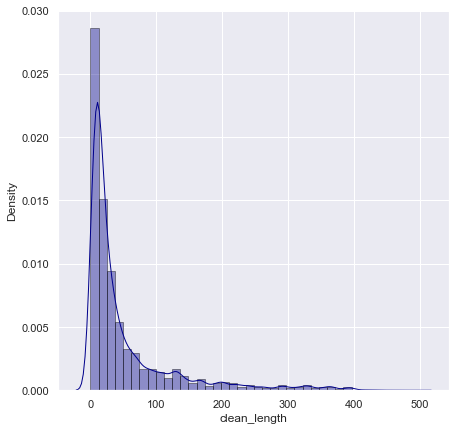

<IPython.core.display.Javascript object>

In [33]:
# Density plot and Histogram of all word count
plt.figure(figsize=(7, 7))
sns.distplot(
    rr["clean_length"],
    hist=True,
    kde=True,
    bins=int(200 / 5),
    color="darkblue",
    hist_kws={"edgecolor": "black"},
    kde_kws={"linewidth": 1},
)

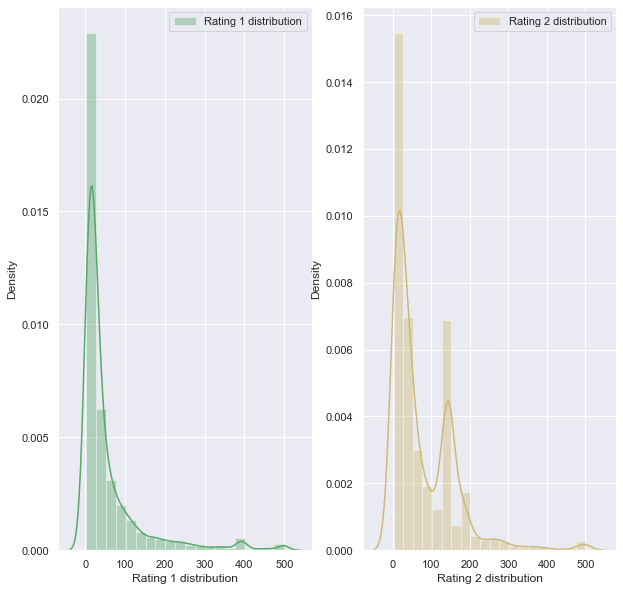

<IPython.core.display.Javascript object>

In [34]:
# message distribution before cleaning

f, ax = plt.subplots(1, 2, figsize=(10, 10))

sns.distplot(
    rr[rr["Ratings"] == 1]["length"],
    bins=20,
    ax=ax[0],
    label="Rating 1 distribution",
    color="g",
)
ax[0].set_xlabel("Rating 1 distribution")
ax[0].legend()

sns.distplot(
    rr[rr["Ratings"] == 2]["length"],
    bins=20,
    ax=ax[1],
    label="Rating 2 distribution",
    color="y",
)
ax[1].set_xlabel("Rating 2 distribution")
ax[1].legend()

plt.show()

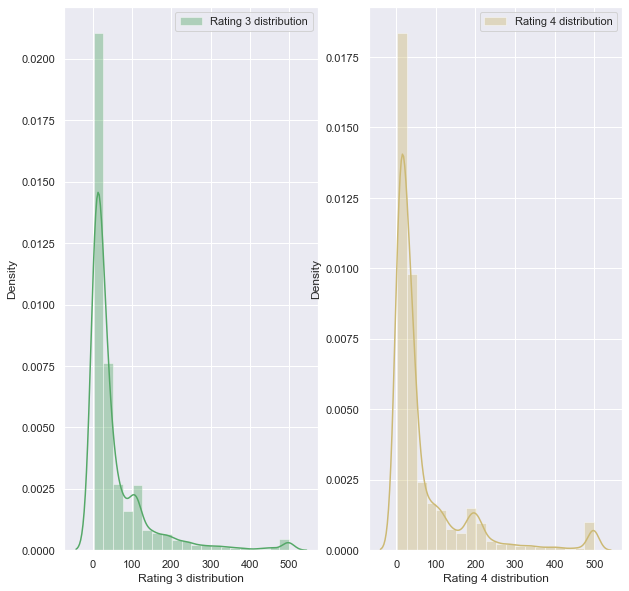

<IPython.core.display.Javascript object>

In [35]:
f, ax = plt.subplots(1, 2, figsize=(10, 10))

sns.distplot(
    rr[rr["Ratings"] == 3]["length"],
    bins=20,
    ax=ax[0],
    label="Rating 3 distribution",
    color="g",
)
ax[0].set_xlabel("Rating 3 distribution")
ax[0].legend()

sns.distplot(
    rr[rr["Ratings"] == 4]["length"],
    bins=20,
    ax=ax[1],
    label="Rating 4 distribution",
    color="y",
)
ax[1].set_xlabel("Rating 4 distribution")
ax[1].legend()

plt.show()

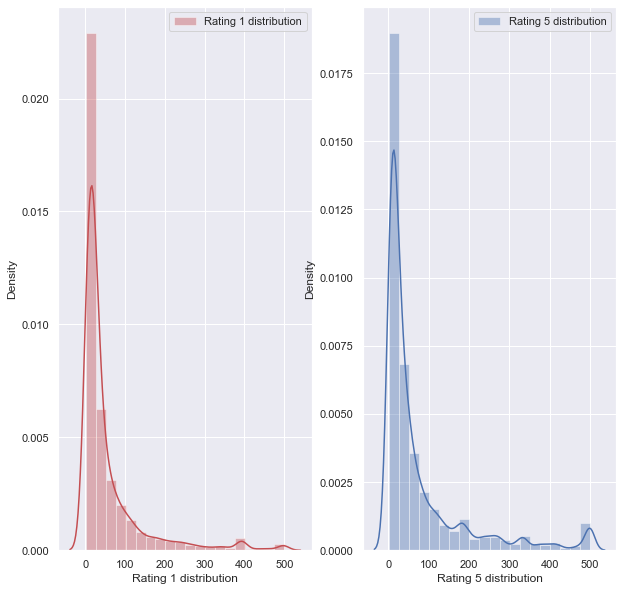

<IPython.core.display.Javascript object>

In [36]:
f, ax = plt.subplots(1, 2, figsize=(10, 10))

sns.distplot(
    rr[rr["Ratings"] == 1]["length"],
    bins=20,
    ax=ax[0],
    label="Rating 1 distribution",
    color="r",
)
ax[0].set_xlabel("Rating 1 distribution")
ax[0].legend()

sns.distplot(
    rr[rr["Ratings"] == 5]["length"],
    bins=20,
    ax=ax[1],
    label="Rating 5 distribution",
    color="b",
)
ax[1].set_xlabel("Rating 5 distribution")
ax[1].legend()

plt.show()

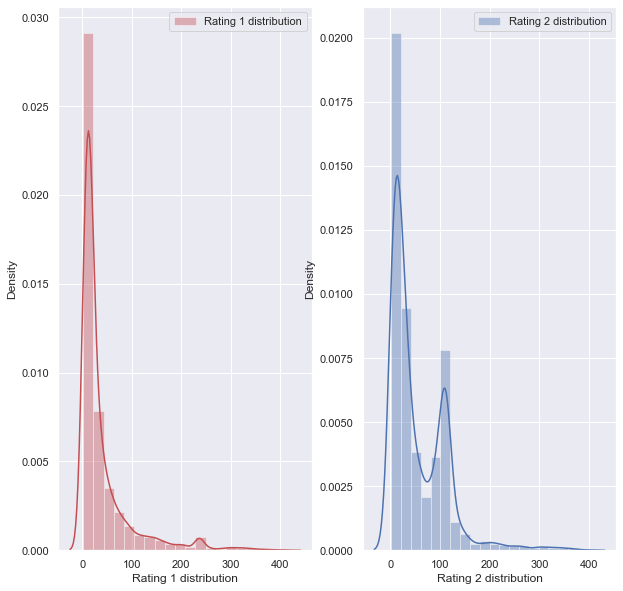

<IPython.core.display.Javascript object>

In [37]:
# message distribution after cleaning

f, ax = plt.subplots(1, 2, figsize=(10, 10))

sns.distplot(
    rr[rr["Ratings"] == 1]["clean_length"],
    bins=20,
    ax=ax[0],
    label="Rating 1 distribution",
    color="r",
)
ax[0].set_xlabel("Rating 1 distribution")
ax[0].legend()

sns.distplot(
    rr[rr["Ratings"] == 2]["clean_length"],
    bins=20,
    ax=ax[1],
    label="Rating 2 distribution",
    color="b",
)
ax[1].set_xlabel("Rating 2 distribution")
ax[1].legend()

plt.show()

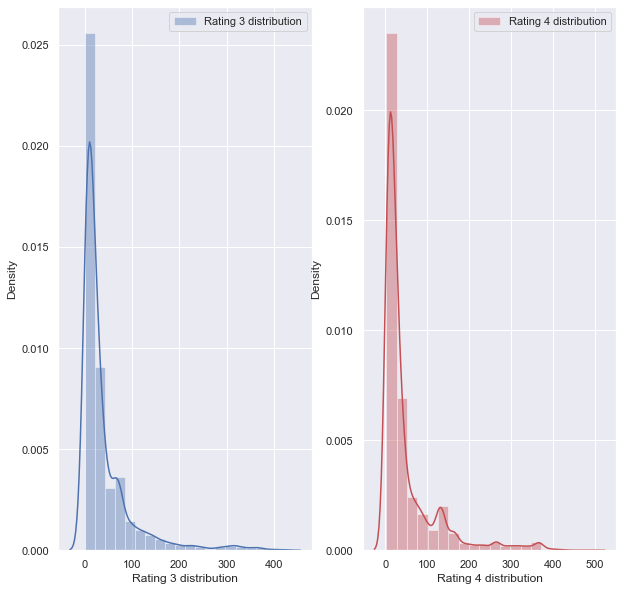

<IPython.core.display.Javascript object>

In [38]:
f, ax = plt.subplots(1, 2, figsize=(10, 10))

sns.distplot(
    rr[rr["Ratings"] == 3]["clean_length"],
    bins=20,
    ax=ax[0],
    label="Rating 3 distribution",
    color="b",
)
ax[0].set_xlabel("Rating 3 distribution")
ax[0].legend()

sns.distplot(
    rr[rr["Ratings"] == 4]["clean_length"],
    bins=20,
    ax=ax[1],
    label="Rating 4 distribution",
    color="r",
)
ax[1].set_xlabel("Rating 4 distribution")
ax[1].legend()

plt.show()

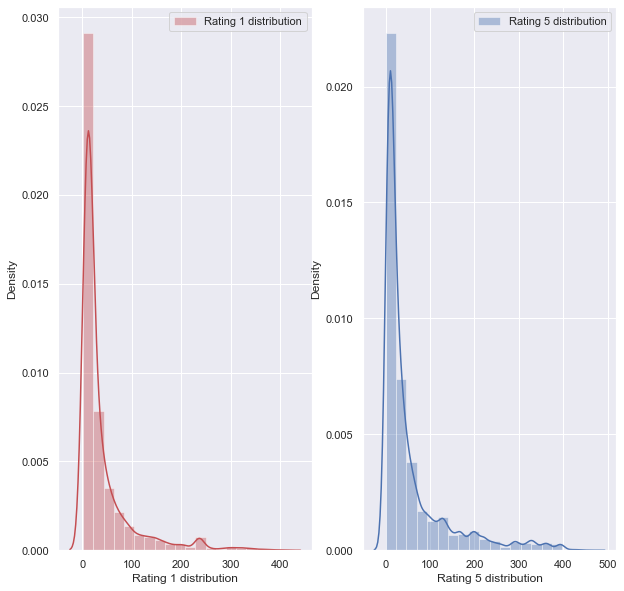

<IPython.core.display.Javascript object>

In [39]:
f, ax = plt.subplots(1, 2, figsize=(10, 10))

sns.distplot(
    rr[rr["Ratings"] == 1]["clean_length"],
    bins=20,
    ax=ax[0],
    label="Rating 1 distribution",
    color="r",
)
ax[0].set_xlabel("Rating 1 distribution")
ax[0].legend()

sns.distplot(
    rr[rr["Ratings"] == 5]["clean_length"],
    bins=20,
    ax=ax[1],
    label="Rating 5 distribution",
    color="b",
)
ax[1].set_xlabel("Rating 5 distribution")
ax[1].legend()

plt.show()

## Lemmatization

In [40]:
import nltk

from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()

<IPython.core.display.Javascript object>

In [41]:
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith("J"):
        return wordnet.ADJ
    elif nltk_tag.startswith("V"):
        return wordnet.VERB
    elif nltk_tag.startswith("N"):
        return wordnet.NOUN
    elif nltk_tag.startswith("R"):
        return wordnet.ADV
    else:
        return None

<IPython.core.display.Javascript object>

In [42]:
def lemmatize_sentence(sentence):
    # tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    # tuple of (token,wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            # if there is no availabel tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            # else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

<IPython.core.display.Javascript object>

In [43]:
import nltk

nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tusha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<IPython.core.display.Javascript object>

In [44]:
import nltk

nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tusha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

<IPython.core.display.Javascript object>

In [45]:
rr["Full_review"] = rr["Full_review"].apply(lambda x: lemmatize_sentence(x))

<IPython.core.display.Javascript object>

In [46]:
rr["Full_review"][1:10]

1    purchase laptop numbr month back face battery ...
2    laptop good numbrgb ram upgrade numbrgb work a...
3    everything best price range beast boot speed u...
4    almost year laptop work well sometimes lag mon...
5    good performance laptop range fast charge disp...
6    best laptop price range good programming gamin...
7    want low budget gaming laptop would recommend ...
8    pro decent battery good display fast bootup ra...
9     fab best budget friendly game laptop work smooth
Name: Full_review, dtype: object

<IPython.core.display.Javascript object>

### Noise removal

### Frequency of words

In [47]:
rr_tf = (
    (rr["Full_review"][0:1])
    .apply(lambda x: pd.value_counts(x.split(" ")))
    .sum(axis=0)
    .reset_index()
)
rr_tf.columns = ["words", "tf"]
rr_tf

,words,tf
0,one,3
1,numbr,3
2,quality,2
3,would,2
4,display,2
5,design,2
6,hinge,2
7,finish,1
8,first,1
9,smooth,1


<IPython.core.display.Javascript object>

## Exploratory Data Analysis

In [48]:
# visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image  # for word colud image

<IPython.core.display.Javascript object>

In [49]:
! pip install wordcloud

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Ratings', ylabel='count'>

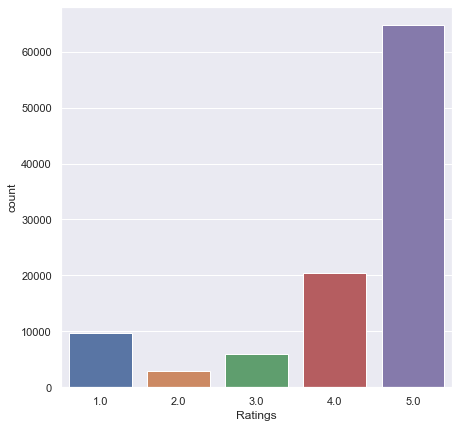

<IPython.core.display.Javascript object>

In [50]:
plt.figure(figsize=(7, 7))
import seaborn as sns

sns.countplot(data=rr, x="Ratings")

In [51]:
for i in ["Full_review"]:
    print("no. of unique values is %s is :  %s" % (i, rr[i].unique()))

no. of unique values is Full_review is :  ['first impression one day full usage numbr fist thing impressed design build quality satisfy design surface smooth matte finish hardly fingerprint would pickup though material plastic would never feel bad numbr hinge thin good quality lift one finger flex hinge flat upto numbrdegree numbr display think one best display budget fhd anti g'
 'purchase laptop numbr month back face battery hardware issue laptop battery charge lock case acer support proper response generic statement wait since numbr day still one attend trouble shoot call link case track completely unaware case status link provide working product good support really poor must say please check review buy acer product'
 'laptop good numbrgb ram upgrade numbrgb work absolutely great play pubg smooth extreme totally smooth try hd extreme work fine heat orefer smooth extreme upgrade ram numbrgb fast btw boot within numbrseconds'
 ...
 'work fine installation easy issue even though produc

<IPython.core.display.Javascript object>

In [52]:
# Create a new rr frame "reviews" to perform exploratory rr analysis upon that
reviews = rr
# Dropping null values
reviews.dropna(inplace=True)

<IPython.core.display.Javascript object>

In [53]:
score_1 = rr[rr["Ratings"] == 1]
score_2 = rr[rr["Ratings"] == 2]
score_3 = rr[rr["Ratings"] == 3]
score_4 = rr[rr["Ratings"] == 4]
score_5 = rr[rr["Ratings"] == 5]

<IPython.core.display.Javascript object>

In [54]:
reviews_sample = pd.concat([score_1, score_2, score_3, score_4, score_5], axis=0)
reviews_sample.reset_index(drop=True, inplace=True)

<IPython.core.display.Javascript object>

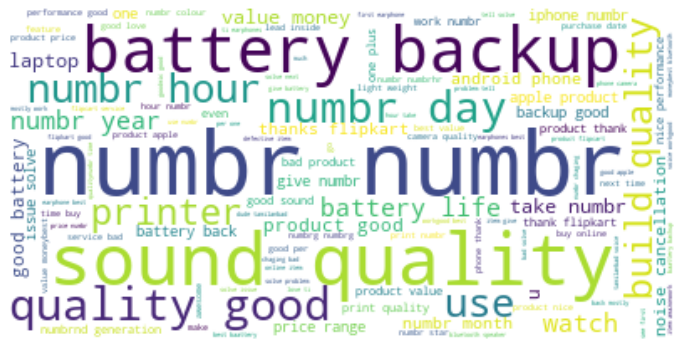

<IPython.core.display.Javascript object>

In [55]:
# Wordcloud function's input needs to be a single string of text.
# Concatenating all Summaries into a single string.
# Similarly you can build for Text column
reviews_str = reviews_sample.Full_review.str.cat()
wordcloud = WordCloud(background_color="white").generate(reviews_str)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [56]:
# Now let's split the rr into Negative (Score is 1 or 2) and Positive (4 or 5) Reviews.
negative_reviews = reviews_sample[reviews_sample["Ratings"].isin([1, 2])]
positive_reviews = reviews_sample[reviews_sample["Ratings"].isin([4, 5])]
# Transform to single string
negative_reviews_str = negative_reviews.Full_review.str.cat()
positive_reviews_str = positive_reviews.Full_review.str.cat()

<IPython.core.display.Javascript object>

Wall time: 5.83 s


Text(0.5, 1.0, 'Reviews with Negative Ratings')

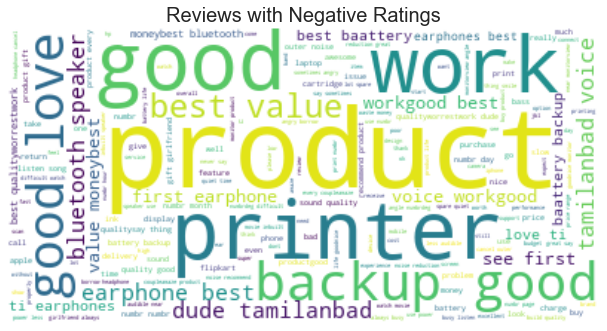

<IPython.core.display.Javascript object>

In [57]:
%%time
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='black').generate(positive_reviews_str)
# Plot
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Ratings',fontsize=20)

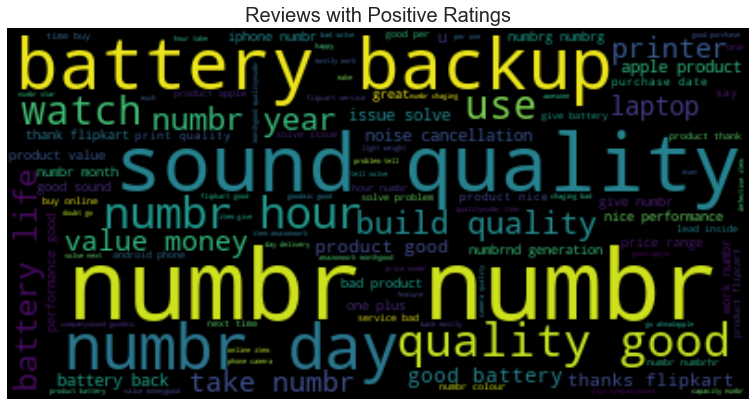

<IPython.core.display.Javascript object>

In [58]:
fig = plt.figure(figsize=(15, 15))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive, interpolation="bilinear")
ax2.axis("off")
ax2.set_title("Reviews with Positive Ratings", fontsize=20)
plt.show()

In [59]:
!pip install vaderSentiment

<IPython.core.display.Javascript object>

In [60]:
import seaborn as sns
import re
import os
import sys
import ast

plt.style.use("fivethirtyeight")
# Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

<IPython.core.display.Javascript object>

In [61]:
# Generating sentiment for all the reviews present in the rrset
emptyline = []
for row in rr["Full_review"]:

    vs = analyzer.polarity_scores(row)
    emptyline.append(vs)
# Creating new rrframe with sentiments
rr_sentiments = pd.DataFrame(emptyline)
rr_sentiments.head()

,neg,neu,pos,compound
0,0.035,0.694,0.271,0.9398
1,0.160,0.680,0.160,0.0036
2,0.000,0.699,0.301,0.9011
3,0.147,0.581,0.271,0.8384
4,0.105,0.480,0.415,0.7964


<IPython.core.display.Javascript object>

In [62]:
# Merging the sentiments back to reviews rrframe
rr_merged = pd.concat([rr.reset_index(drop=True), rr_sentiments], axis=1)
rr_merged.head(6)

,Ratings,Full_review,length,clean_length,neg,neu,pos,compound
0,5.0,first impression one day full usage numbr fist...,496,343,0.035,0.694,0.271,0.9398
1,2.0,purchase laptop numbr month back face battery ...,494,368,0.160,0.680,0.160,0.0036
2,4.0,laptop good numbrgb ram upgrade numbrgb work a...,305,216,0.000,0.699,0.301,0.9011
3,5.0,everything best price range beast boot speed u...,499,332,0.147,0.581,0.271,0.8384
4,5.0,almost year laptop work well sometimes lag mon...,141,90,0.105,0.480,0.415,0.7964
5,5.0,good performance laptop range fast charge disp...,137,105,0.000,0.482,0.518,0.8957


<IPython.core.display.Javascript object>

In [63]:
# Convert ratings into positive and negetive sentiments using some threshold
rr_merged["Sentiment"] = np.where(rr_merged["compound"] >= 0, "Positive", "Negative")
rr_merged.head(8)

,Ratings,Full_review,length,clean_length,neg,neu,pos,compound,Sentiment
0,5.0,first impression one day full usage numbr fist...,496,343,0.035,0.694,0.271,0.9398,Positive
1,2.0,purchase laptop numbr month back face battery ...,494,368,0.160,0.680,0.160,0.0036,Positive
2,4.0,laptop good numbrgb ram upgrade numbrgb work a...,305,216,0.000,0.699,0.301,0.9011,Positive
3,5.0,everything best price range beast boot speed u...,499,332,0.147,0.581,0.271,0.8384,Positive
4,5.0,almost year laptop work well sometimes lag mon...,141,90,0.105,0.480,0.415,0.7964,Positive
5,5.0,good performance laptop range fast charge disp...,137,105,0.000,0.482,0.518,0.8957,Positive
6,4.0,best laptop price range good programming gamin...,418,296,0.000,0.769,0.231,0.9216,Positive
7,4.0,want low budget gaming laptop would recommend ...,392,229,0.090,0.661,0.249,0.7579,Positive


<IPython.core.display.Javascript object>

<AxesSubplot:>

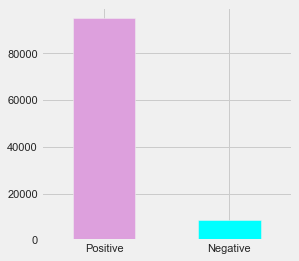

<IPython.core.display.Javascript object>

In [64]:
plt.figure(figsize=(4, 4))
Result = rr_merged["Sentiment"].value_counts()
Result.plot(kind="bar", rot=0, color=["plum", "cyan"])

#### Above plot shows that there is a huge difference between positive and negative sentiments. It can be seen that most of the customer are satisfied.

### Training Data Preparation

In [65]:
# converting features into vectors
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec = TfidfVectorizer(max_features=10000, stop_words="english")

<IPython.core.display.Javascript object>

In [66]:
# Let's Separate the input and output variables represented by X and y respectively

X = tf_vec.fit_transform(rr["Full_review"])
y = rr["Ratings"]

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Ratings', ylabel='count'>

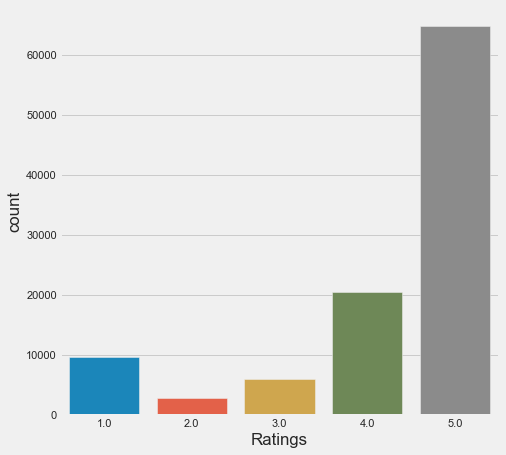

<IPython.core.display.Javascript object>

In [74]:
plt.figure(figsize=(7, 7))
sns.countplot(y)

In [68]:
### Balancing the datset.

<IPython.core.display.Javascript object>

In [69]:
# using re-sample techinique to imbalance the balanced class,

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_over, y_over = sm.fit_resample(X, y)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Ratings', ylabel='count'>

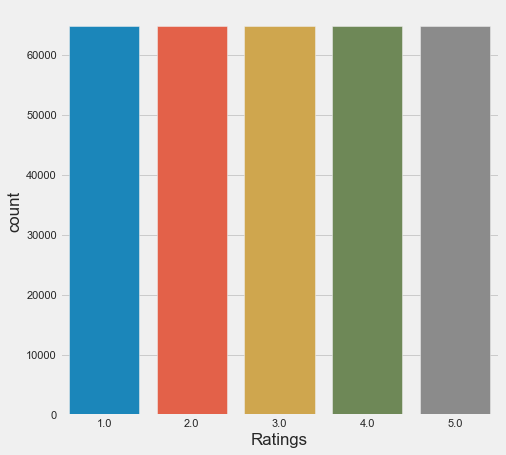

<IPython.core.display.Javascript object>

In [75]:
plt.figure(figsize=(7, 7))
sns.countplot(y_over)

In [71]:
# now it can be seen that the dataset is balanced.

<IPython.core.display.Javascript object>

In [72]:
x_train, x_test, y_train, y_test = train_test_split(
    x_over, y_over, test_size=0.20, random_state=100
)

<IPython.core.display.Javascript object>

In [76]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lor = LogisticRegression()
lor.fit(x_train, y_train)
y_pred = lor.predict(x_test)
scr_lor = cross_val_score(lor, x_over, y_over, cv=5)


print("F1 score \n", f1_score(y_test, y_pred, average="micro"))
print("CV Score :", scr_lor.mean())
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test, y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test, y_pred))

F1 score 
 0.4746419311026053
CV Score : 0.43183109025805655
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

         1.0       0.53      0.45      0.49     12955
         2.0       0.56      0.52      0.54     12772
         3.0       0.41      0.49      0.45     13054
         4.0       0.40      0.45      0.42     12909
         5.0       0.51      0.46      0.48     13102

    accuracy                           0.47     64792
   macro avg       0.48      0.47      0.48     64792
weighted avg       0.48      0.47      0.48     64792

--------------------------------------------------------

Confusion Matrix 
 [[5874 1620 2079 2001 1381]
 [1289 6586 1975 1824 1098]
 [1401 1488 6408 2422 1335]
 [1209 1191 2729 5872 1908]
 [1300  792 2348 2649 6013]]


<IPython.core.display.Javascript object>

In [77]:
# passive Aggressive Classifier

from sklearn.linear_model import PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier()
pac.fit(x_train, y_train)
y_pred = pac.predict(x_test)
scr_pac = cross_val_score(pac, x_over, y_over, cv=5)


print("F1 score \n", f1_score(y_test, y_pred, average="micro"))
print("CV Score :", scr_pac.mean())
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test, y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test, y_pred))

F1 score 
 0.4762007655266082
CV Score : 0.45504691937276204
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

         1.0       0.38      0.58      0.46     12955
         2.0       0.64      0.55      0.59     12772
         3.0       0.44      0.44      0.44     13054
         4.0       0.54      0.40      0.46     12909
         5.0       0.47      0.42      0.44     13102

    accuracy                           0.48     64792
   macro avg       0.50      0.48      0.48     64792
weighted avg       0.50      0.48      0.48     64792

--------------------------------------------------------

Confusion Matrix 
 [[7531  989 1638  990 1807]
 [2587 7029 1469  792  895]
 [3677 1190 5697 1000 1490]
 [3133  899 1805 5137 1935]
 [3103  816 2210 1513 5460]]


<IPython.core.display.Javascript object>

In [78]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
scr_dt = cross_val_score(dt, x_over, y_over, cv=5)


print("F1 score \n", f1_score(y_test, y_pred, average="micro"))
print("CV Score :", scr_dt.mean())
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test, y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test, y_pred))

F1 score 
 0.6409124583281887
CV Score : 0.595514878380047
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

         1.0       0.71      0.64      0.68     12955
         2.0       0.85      0.71      0.77     12772
         3.0       0.54      0.74      0.62     13054
         4.0       0.61      0.54      0.57     12909
         5.0       0.58      0.57      0.57     13102

    accuracy                           0.64     64792
   macro avg       0.66      0.64      0.64     64792
weighted avg       0.66      0.64      0.64     64792

--------------------------------------------------------

Confusion Matrix 
 [[8293  428 1895 1075 1264]
 [ 502 9110 1611  654  895]
 [ 759  370 9671 1007 1247]
 [ 967  387 2485 6994 2076]
 [1080  462 2312 1790 7458]]


<IPython.core.display.Javascript object>

In [79]:
import time

<IPython.core.display.Javascript object>

In [80]:
%%time
# Random forest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
scr_rfc = cross_val_score(rfc, x_over, y_over, cv=5)

print("F1 score \n", f1_score(y_test, y_pred, average="micro"))
print("CV Score :", scr_rfc.mean())
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test, y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test, y_pred))

F1 score 
 0.7061365600691444
CV Score : 0.6626990986541549
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

         1.0       0.79      0.72      0.75     12955
         2.0       0.89      0.74      0.81     12772
         3.0       0.58      0.81      0.68     13054
         4.0       0.70      0.62      0.66     12909
         5.0       0.65      0.64      0.64     13102

    accuracy                           0.71     64792
   macro avg       0.72      0.71      0.71     64792
weighted avg       0.72      0.71      0.71     64792

--------------------------------------------------------

Confusion Matrix 
 [[ 9332   296  1665   717   945]
 [  398  9506  1545   546   777]
 [  483   296 10570   721   984]
 [  634   252  2249  8022  1752]
 [  930   309  2073  1468  8322]]
Wall time: 1h 57min 16s


<IPython.core.display.Javascript object>

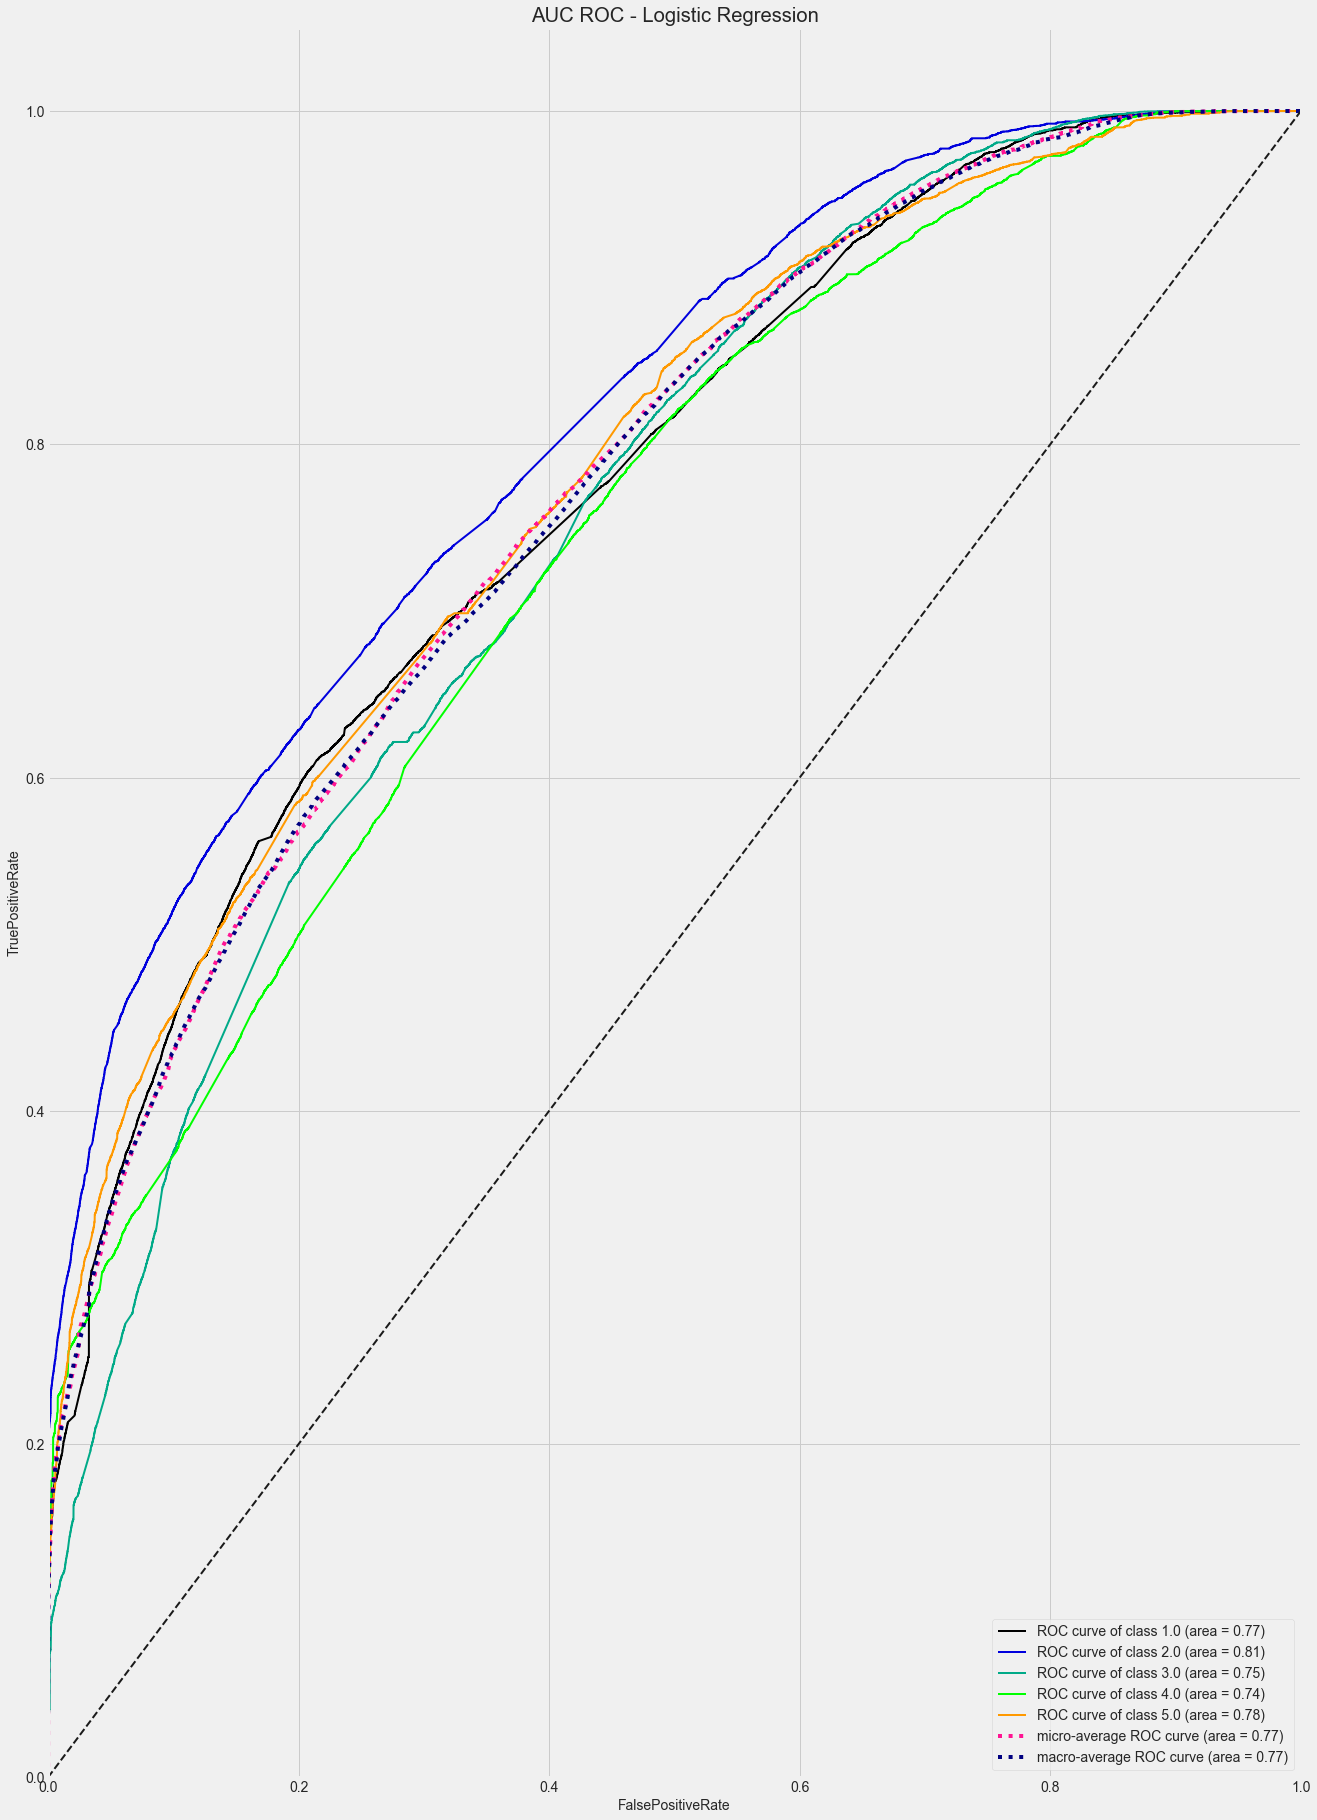

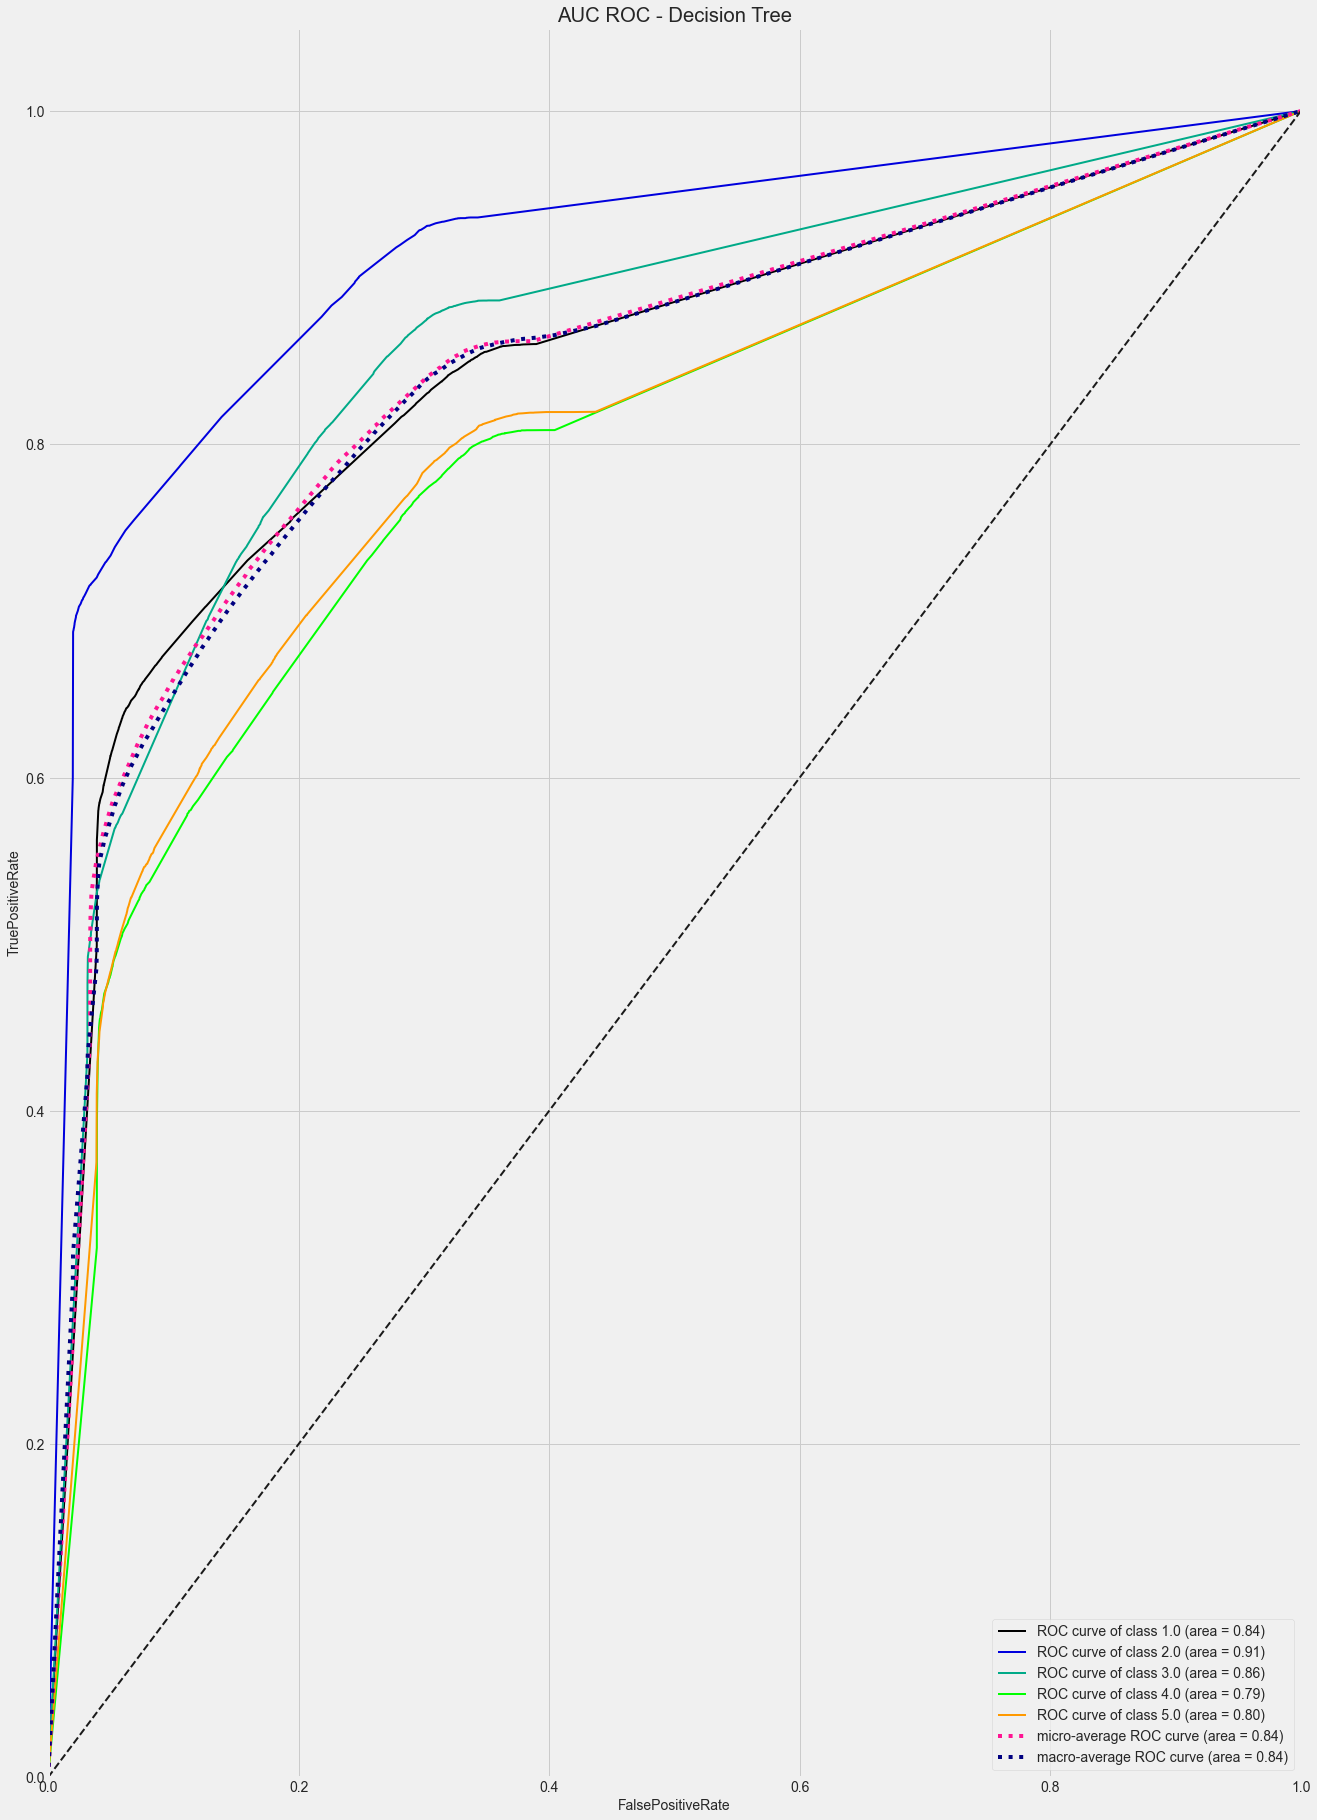

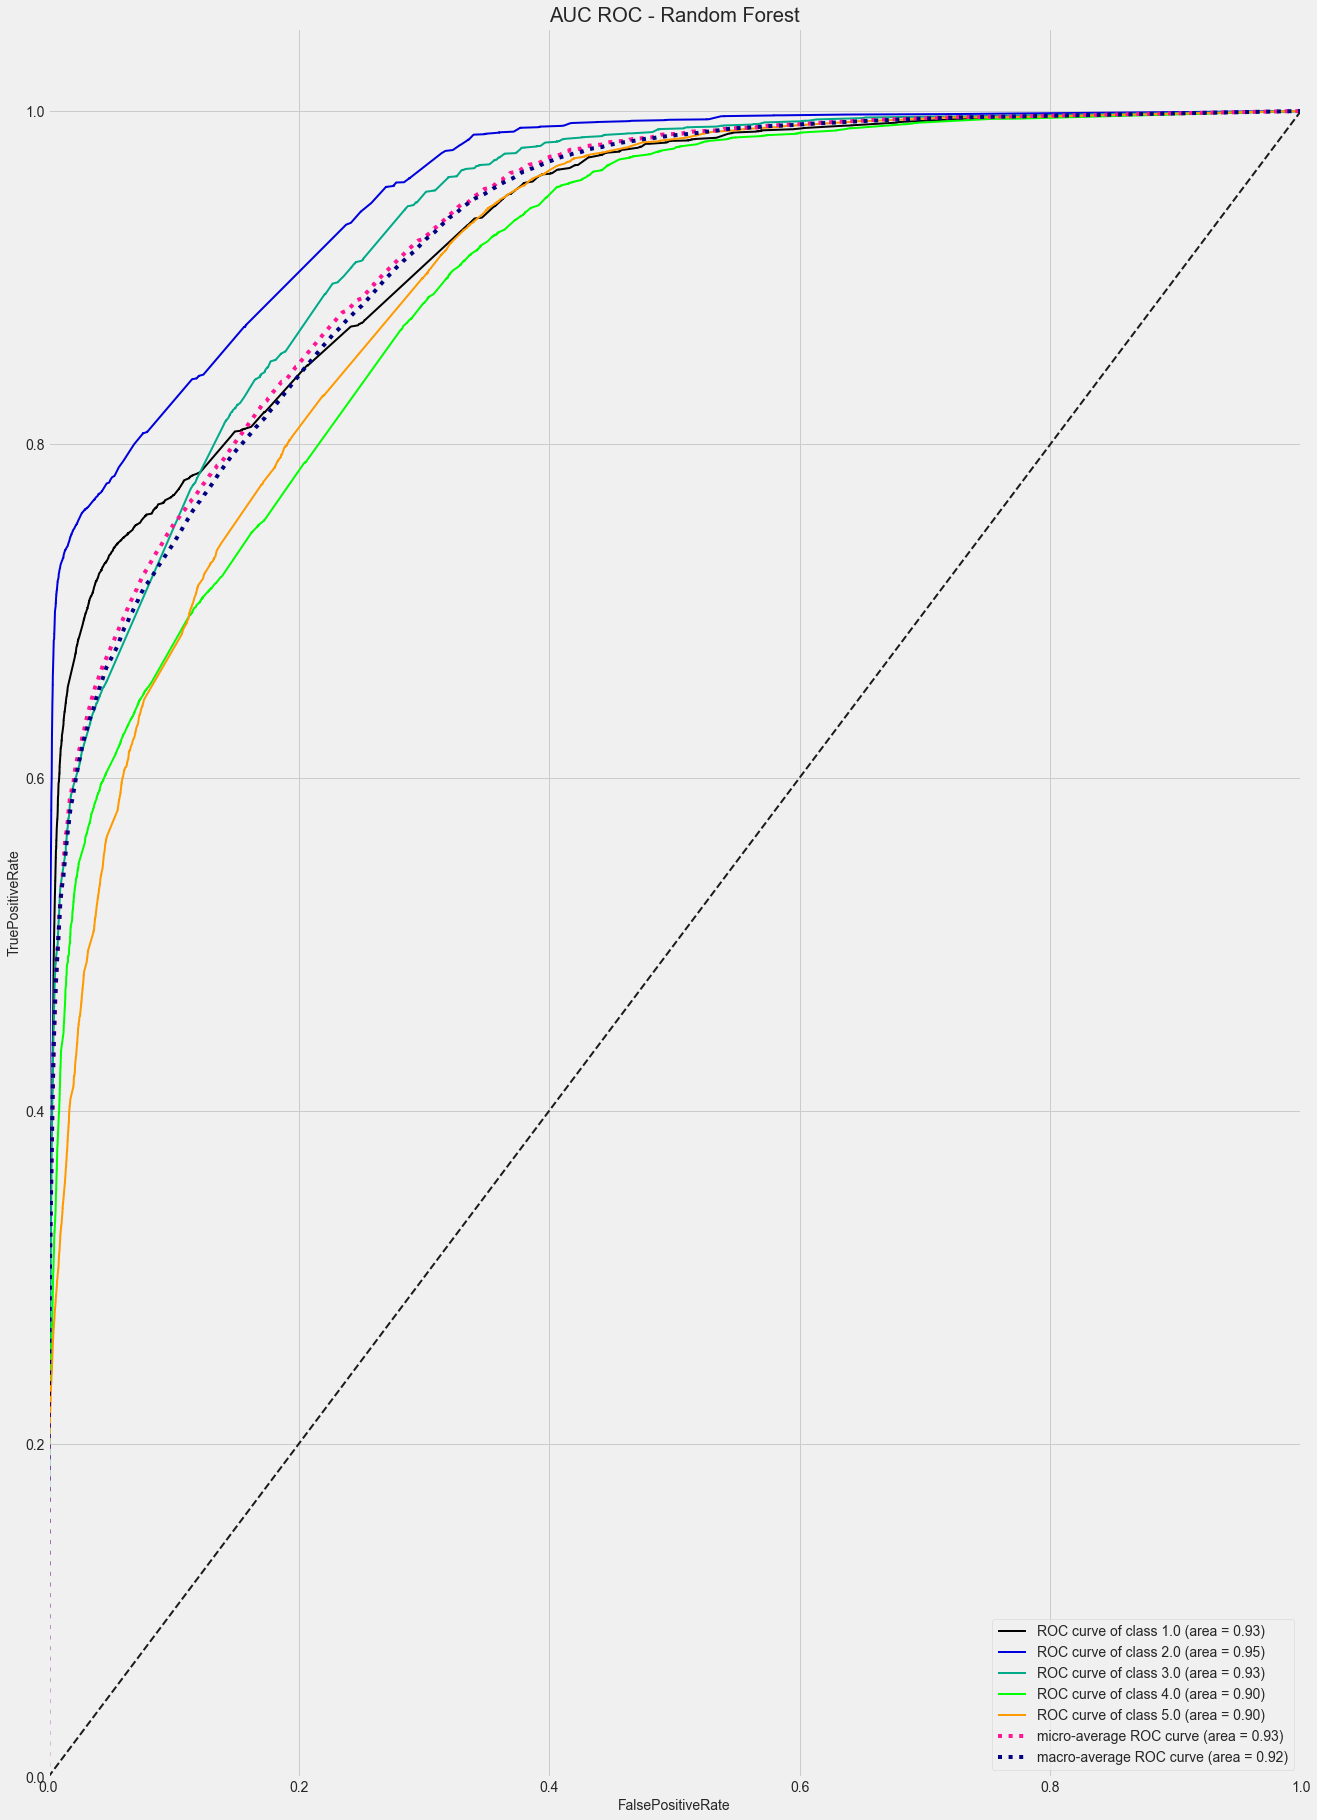

Wall time: 6.87 s


<IPython.core.display.Javascript object>

In [104]:
%%time
# roc curve for all models

import scikitplot as skplt

probas1 = lor.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas1)

plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('AUC ROC - Logistic Regression')
plt.show()


probas3 = dt.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas3)

plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('AUC ROC - Decision Tree')
plt.show()

probas4 = rfc.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas4)

plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('AUC ROC - Random Forest')
plt.show()



In [84]:
# As we can see that out of all models, random forest classifier has high accuracy in terms of cross validation score. 66%. Lets try parameter tuning to the best model,

<IPython.core.display.Javascript object>

In [85]:
%%time
# applying hyper parameter tuning to the Random forest model.

param = {'n_estimators' : [40,60,80,100] ,'max_depth': [4,8,12,16,20],'criterion' : ['gini','entropy'],
             'min_samples_leaf' : [2,4,6,8,10], 'min_samples_split' : [3,6,9,12,15] }

rsc = RandomizedSearchCV(rfc, param_distributions = param, cv= 5)

rsc.fit(x_train,y_train)
rsc.best_params_

Wall time: 12min 30s


{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 8,
 'max_depth': 16,
 'criterion': 'entropy'}

<IPython.core.display.Javascript object>

In [99]:
%%time
final = RandomForestClassifier(n_estimators=100 , criterion = 'entropy', max_depth = 128, 
                               min_samples_leaf =2,min_samples_split =3)

final.fit(x_train,y_train)
pred = final.predict(x_test)

print("F1 score \n", f1_score(y_test,pred, average='micro'))
print("Accuracy score \n", accuracy_score(y_test,pred))
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n",confusion_matrix(y_test,pred))

F1 score 
 0.5918323249783924
Accuracy score 
 0.5918323249783924
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

         1.0       0.64      0.60      0.62     12955
         2.0       0.90      0.62      0.73     12772
         3.0       0.48      0.71      0.57     13054
         4.0       0.58      0.43      0.50     12909
         5.0       0.53      0.60      0.56     13102

    accuracy                           0.59     64792
   macro avg       0.63      0.59      0.60     64792
weighted avg       0.62      0.59      0.60     64792

--------------------------------------------------------

Confusion Matrix 
 [[7764  223 2378  954 1636]
 [ 797 7878 2143  830 1124]
 [1036  198 9305  907 1608]
 [1368  249 3066 5601 2625]
 [1253  203 2563 1285 7798]]
Wall time: 5min 49s


<IPython.core.display.Javascript object>

#### After Hyper paramateric tuning There is no improvement as accuracy decreases from 71% to 59%

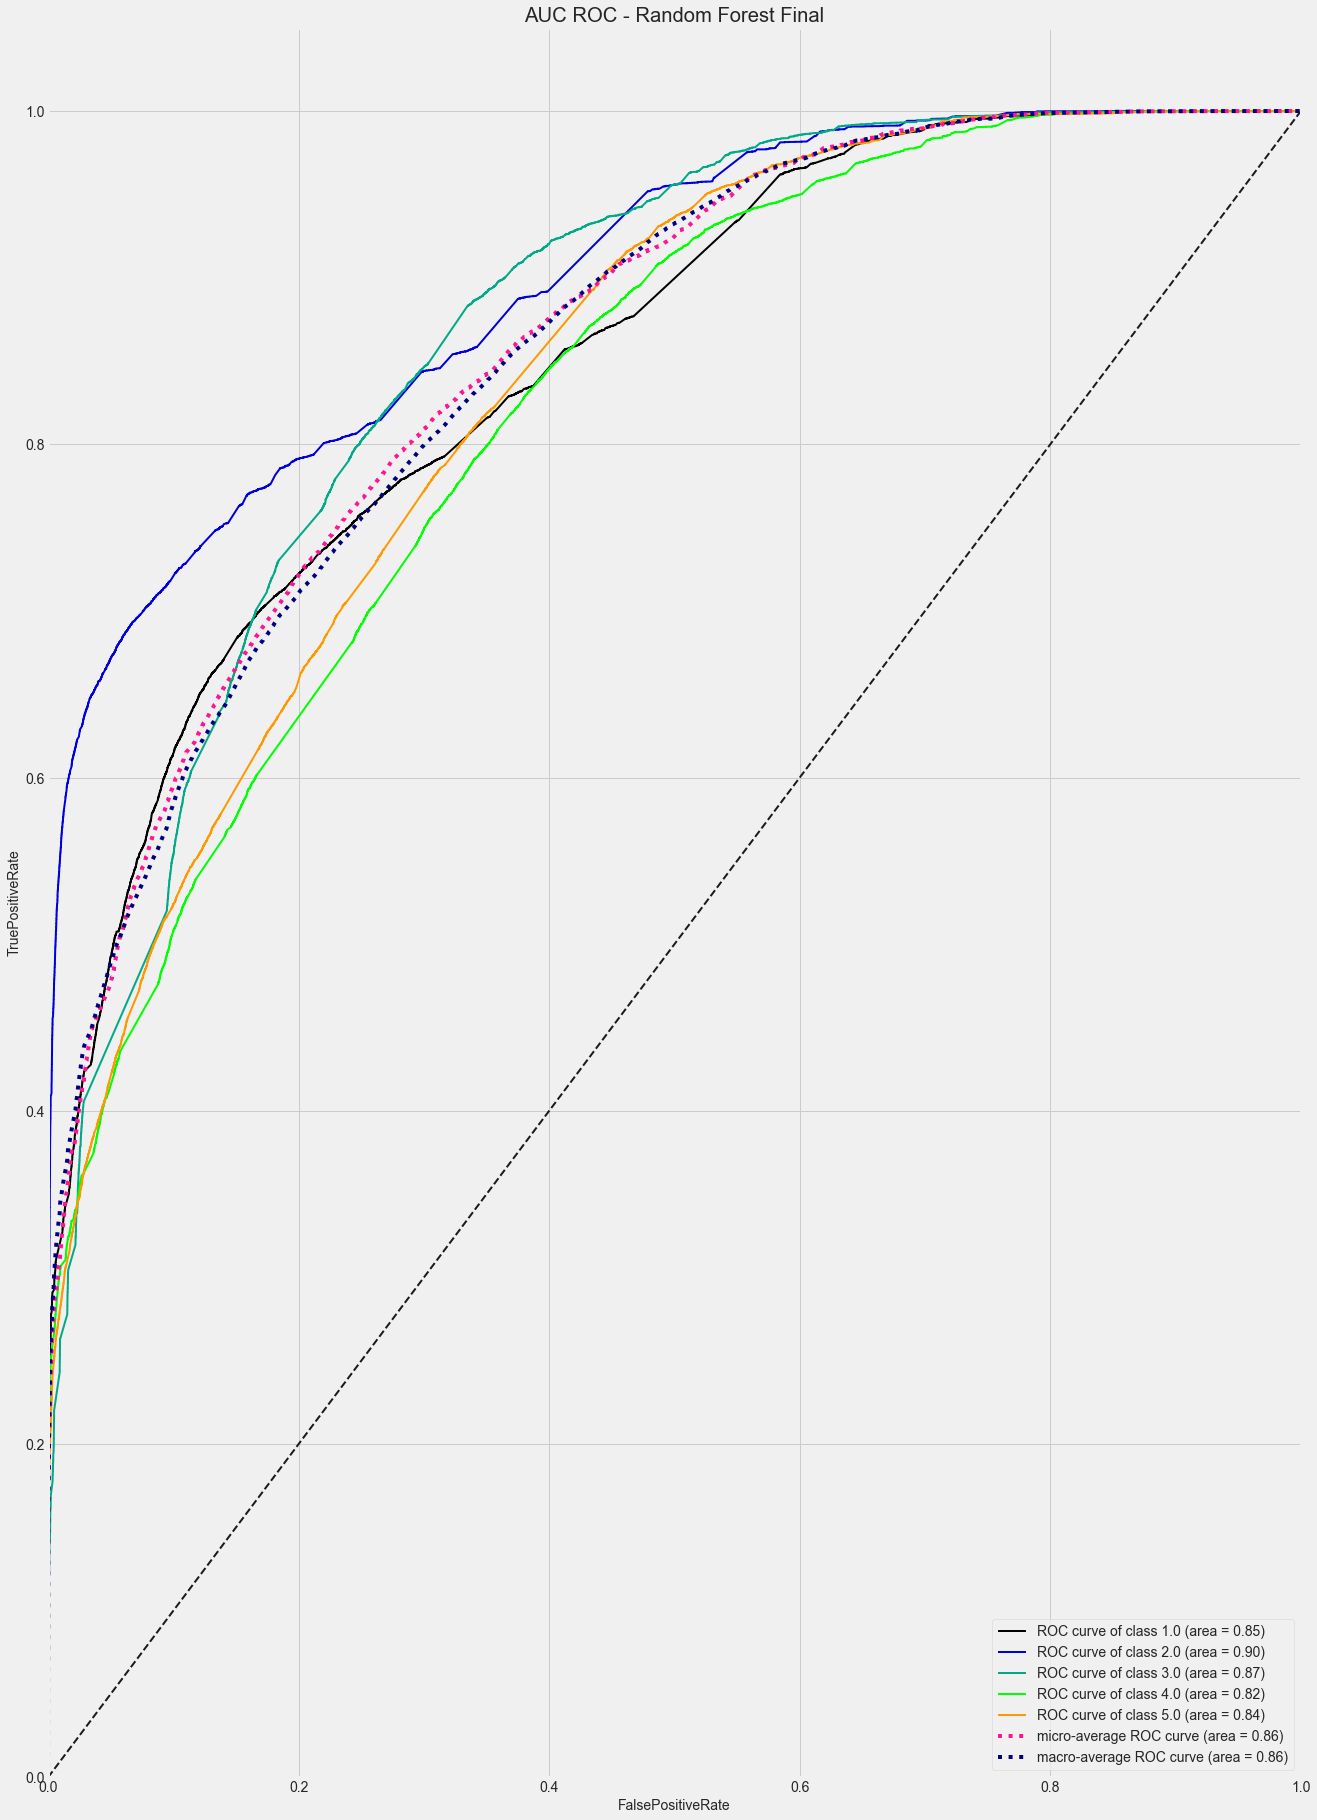

Wall time: 3.2 s


<IPython.core.display.Javascript object>

In [92]:
%%time
#final model roc curve 

probas4 = final.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas4)

plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('AUC ROC - Random Forest Final')
plt.show()


In [88]:
# comparing Actual vs predicted values.

test = pd.DataFrame({"ACtual": y_test, "Predicted": pred})
test.head(25)

,ACtual,Predicted
307924,4.0,4.0
178036,2.0,2.0
227124,3.0,3.0
238360,3.0,4.0
275179,3.0,1.0
177039,2.0,5.0
306260,4.0,2.0
211477,2.0,3.0
222377,3.0,3.0
312429,4.0,4.0


<IPython.core.display.Javascript object>

In [93]:
import joblib

joblib.dump(final, "review.pkl")

['review.pkl']

<IPython.core.display.Javascript object>